# Import

In [ ]:
!pip install ta -q

In [ ]:
import numpy  as np
import pandas as pd
from   tqdm   import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from IPython.display import clear_output
from scipy.signal import argrelextrema
import ast

import time
from datetime import datetime,date

from datetime import timedelta
from sklearn.preprocessing import RobustScaler
# plt.style.use("bmh")

# Technical Analysis library
import ta

# Neural Network library
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
#asset01-train
!gdown --id 1mXz42aGzAQcPCaeDInxsojHkPLcvymOA
#asset02-train
!gdown --id 1JJCS_SicAqo-fmIVfLpMUhk5KLmpKWFt
#asset03-train
!gdown --id 1W1FcZSOwkJEhmo4Oi5XQqXkWbILrj7H2
#asset04-train
!gdown --id 1aWPsgj6IcpiOdwws7XOz6M0zIou1zm7D
#asset05-train
!gdown --id 17H6To6RVq9KXt54hgMEN7tWX5fd87tuz


# new test

#asset01-test
!gdown --id 1Cw09m5KSlufvGe2rZammVbUVc4_BuGwh
#asset02-test
!gdown --id 1e6uSE8SK9DuVNL7rChNQbzEqwgwUgcYq
#asset03-test
!gdown --id 1Md4NyOY93p24v5V7clKCQ7ygqlsfSfEk
#asset04-test
!gdown --id 1cNxX-M7Iw-7oTTpU2iBVYzfxwQiRICjm
#asset05-test
!gdown --id 1WGepF5-F4uCw8hcwlwc6RdywAxVrJHll

Downloading...
From: https://drive.google.com/uc?id=1mXz42aGzAQcPCaeDInxsojHkPLcvymOA
To: /content/Asset01_train.csv
100% 195k/195k [00:00<00:00, 83.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JJCS_SicAqo-fmIVfLpMUhk5KLmpKWFt
To: /content/Asset02_train.csv
100% 191k/191k [00:00<00:00, 74.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W1FcZSOwkJEhmo4Oi5XQqXkWbILrj7H2
To: /content/Asset03_train.csv
100% 190k/190k [00:00<00:00, 54.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aWPsgj6IcpiOdwws7XOz6M0zIou1zm7D
To: /content/Asset04_train.csv
100% 199k/199k [00:00<00:00, 83.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=17H6To6RVq9KXt54hgMEN7tWX5fd87tuz
To: /content/Asset05_train.csv
100% 195k/195k [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Cw09m5KSlufvGe2rZammVbUVc4_BuGwh
To: /content/Asset01_test.csv
100% 43.3k/43.3k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e6uSE8SK9D

In [ ]:
# new test


In [ ]:
!git clone https://github.com/Deepinvest-team/deepinvest_open_environment.git

Cloning into 'deepinvest_open_environment'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [ ]:
import sys
sys.path.append('/content/deepinvest_open_environment')
from deepinvest_open_environment.Observer import Observers

In [ ]:
!pip install zigzag -q

     |████████████████████████████████| 126 kB 5.4 MB/s 


In [ ]:
import zigzag as zz

# Data

In [ ]:
observers = Observers(30,train=True)
observers_test = Observers(30, train=False)

In [ ]:
# Loading train Data
df_a1 = observers.getDataset()['Asset01']
df_a2 = observers.getDataset()['Asset02']
df_a3 = observers.getDataset()['Asset03']
df_a4 = observers.getDataset()['Asset04']
df_a5 = observers.getDataset()['Asset05']

# Loading the test data
df_test_a1 = observers_test.getDataset()['Asset01']
df_test_a2 = observers_test.getDataset()['Asset02']
df_test_a3 = observers_test.getDataset()['Asset03']
df_test_a4 = observers_test.getDataset()['Asset04']
df_test_a5 = observers_test.getDataset()['Asset05']

In [ ]:
def change_to_datetime(df):
  df['Date'] = pd.to_datetime(df.index)
  df.set_index('Date', inplace=True)

change_to_datetime(df_a1)
change_to_datetime(df_a2)
change_to_datetime(df_a3)
change_to_datetime(df_a4)
change_to_datetime(df_a5)

change_to_datetime(df_test_a1)
change_to_datetime(df_test_a2)
change_to_datetime(df_test_a3)
change_to_datetime(df_test_a4)
change_to_datetime(df_test_a5)

In [ ]:
df_a2

,open,high,low,close,volume
Date,,,,,
2010-01-04,79.076464,81.112217,79.076464,80.943401,263542
2010-01-05,81.062562,81.429993,80.387288,81.201588,258887
2010-01-06,80.863955,82.939423,80.287985,82.601790,370059
2010-01-07,82.621648,82.780539,81.688187,82.085408,246632
2010-01-08,82.075476,82.889775,81.231386,82.174779,310377
...,...,...,...,...,...
2018-12-21,45.928502,46.444888,44.816288,45.273090,694003
2018-12-24,45.134064,45.918573,42.065543,42.234360,415859
2018-12-26,42.552135,46.673288,42.224431,45.898712,698408


In [ ]:
df_test_a2

,open,high,low,close,volume
Date,,,,,
2018-11-14,54.885802,56.971202,54.746775,55.858989,844696
2018-11-15,55.630588,56.861966,55.203577,56.067528,256499
2018-11-16,56.186697,57.557101,55.501491,56.067528,159001
2018-11-19,56.325723,56.931483,54.697124,56.365442,699684
2018-11-20,56.991064,57.040715,52.403180,53.058592,983120
...,...,...,...,...,...
2021-12-27,72.869910,75.561071,72.065543,75.044689,268490
2021-12-28,75.441910,76.385303,75.004966,75.451843,249728
2021-12-29,75.511423,76.832180,74.836150,76.027805,283557


# Zig Zag

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def zigzagPlot(X, pivots):
  plt.figure(figsize=(20, 10))
  plt.xlim(0, len(X))
  plt.ylim(X.min()*0.99, X.max()*1.01)
  plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
  plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
  plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
  plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

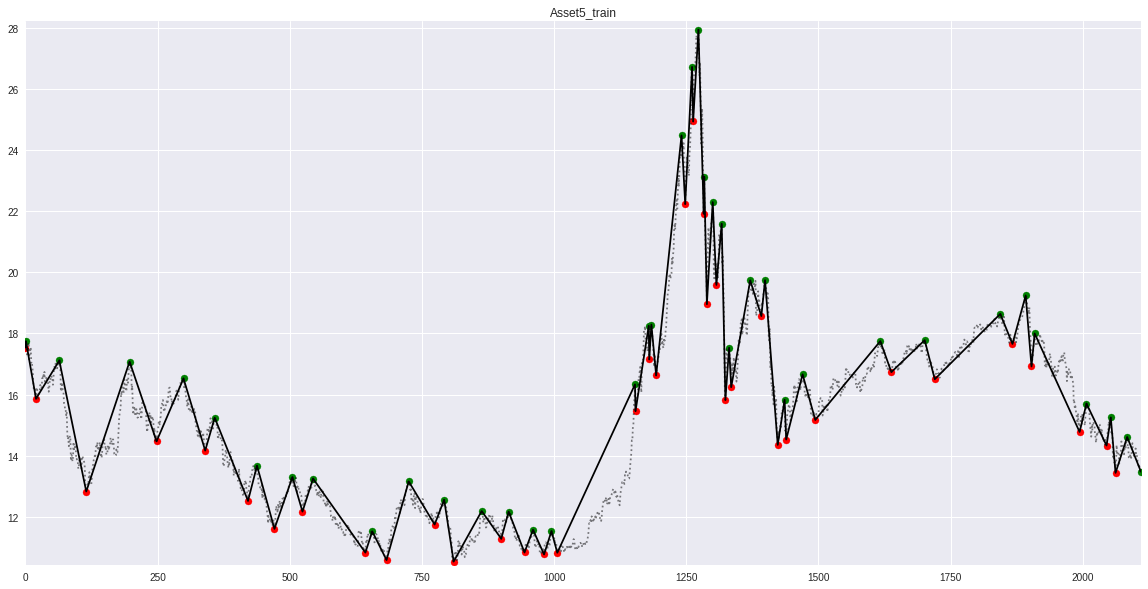

In [ ]:
zigzagPlot(asset5_closePrices, pivots)
plt.title("Asset5_train")
plt.show()

# gen pivots from my predictions

In [ ]:
!pip install zigzag -q

In [ ]:
import zigzag as zz

In [ ]:
def asset_zigzag(df, ratio):
  asset = df['close'].values
  pivots = zz.peak_valley_pivots(asset, ratio, -ratio)
  df['labels'] = pivots
  return asset, pivots

In [ ]:
df1 = pd.read_csv("/content/predictions_test1_new.csv")
df2 = pd.read_csv("/content/predictions_test2_new.csv")
df3 = pd.read_csv("/content/predictions_test3_new.csv")
df4 = pd.read_csv("/content/predictions_test4_new.csv")
df5 = pd.read_csv("/content/predictions_test5_new.csv")

df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)
df5.dropna(inplace=True)

In [ ]:
datasets = {'Asset01' : df1, 'Asset02' : df2, 'Asset03' : df3, 'Asset04' : df4, 'Asset05' : df5}
datasets

{'Asset01':            Date      close
 0    2020-01-02  10.976418
 1    2020-01-03  10.962177
 2    2020-01-06  10.966592
 3    2020-01-07  10.957076
 4    2020-01-08  10.941422
 ..          ...        ...
 464  2021-12-27  10.900814
 465  2021-12-28  10.899072
 466  2021-12-29  10.909825
 467  2021-12-30  10.911107
 468  2021-12-31  10.926104
 
 [469 rows x 2 columns], 'Asset02':            Date      close
 0    2020-01-02  49.397724
 1    2020-01-03  50.505886
 2    2020-01-06  51.023880
 3    2020-01-07  51.392246
 4    2020-01-08  51.153469
 ..          ...        ...
 464  2021-12-27  70.500465
 465  2021-12-28  70.798950
 466  2021-12-29  70.978264
 467  2021-12-30  71.200645
 468  2021-12-31  70.695786
 
 [469 rows x 2 columns], 'Asset03':            Date      close
 0    2020-01-02  15.988380
 1    2020-01-03  16.014175
 2    2020-01-06  16.008890
 3    2020-01-07  15.998564
 4    2020-01-08  15.992159
 ..          ...        ...
 464  2021-12-27  17.162556
 465  2021-12-28  1

In [ ]:
asset1_zigzag, p1 = asset_zigzag(df1, 0.01)
asset2_zigzag, p2 = asset_zigzag(df2, 0.09)
asset3_zigzag, p3 = asset_zigzag(df3, 0.05)
asset4_zigzag, p4 = asset_zigzag(df4, 0.09)
asset5_zigzag, p5 = asset_zigzag(df5, 0.01)

In [ ]:
# [0.01, 0.09, 0.05, 0.09, 0.01]

# visualize

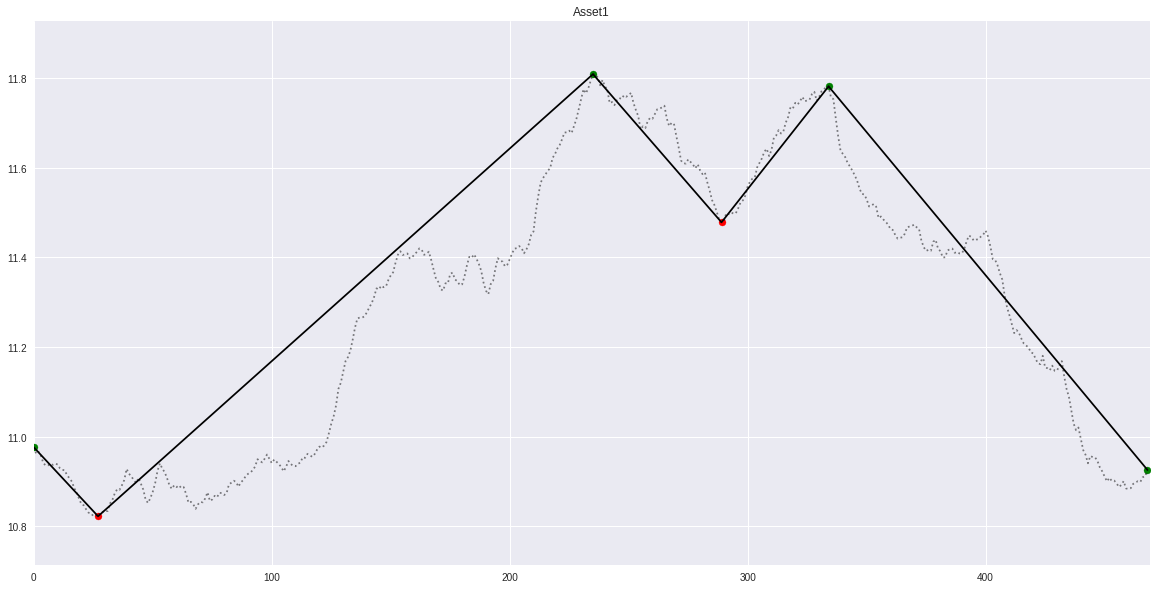

In [ ]:
zigzagPlot(asset1_zigzag, p1)
plt.title("Asset1")
plt.show()

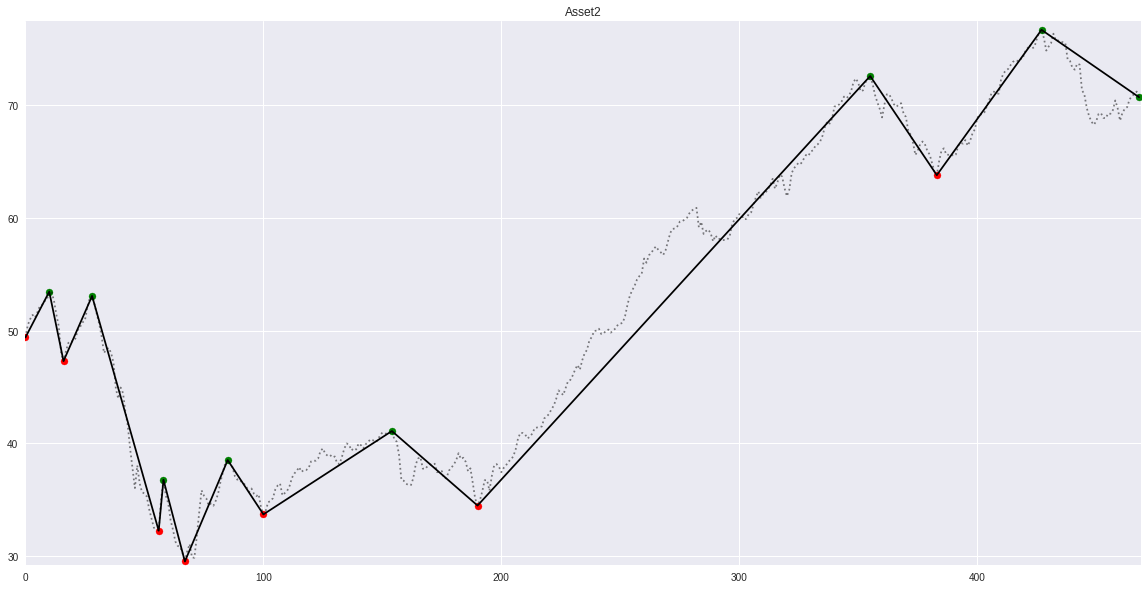

In [ ]:
zigzagPlot(asset2_zigzag, p2)
plt.title("Asset2")
plt.show()

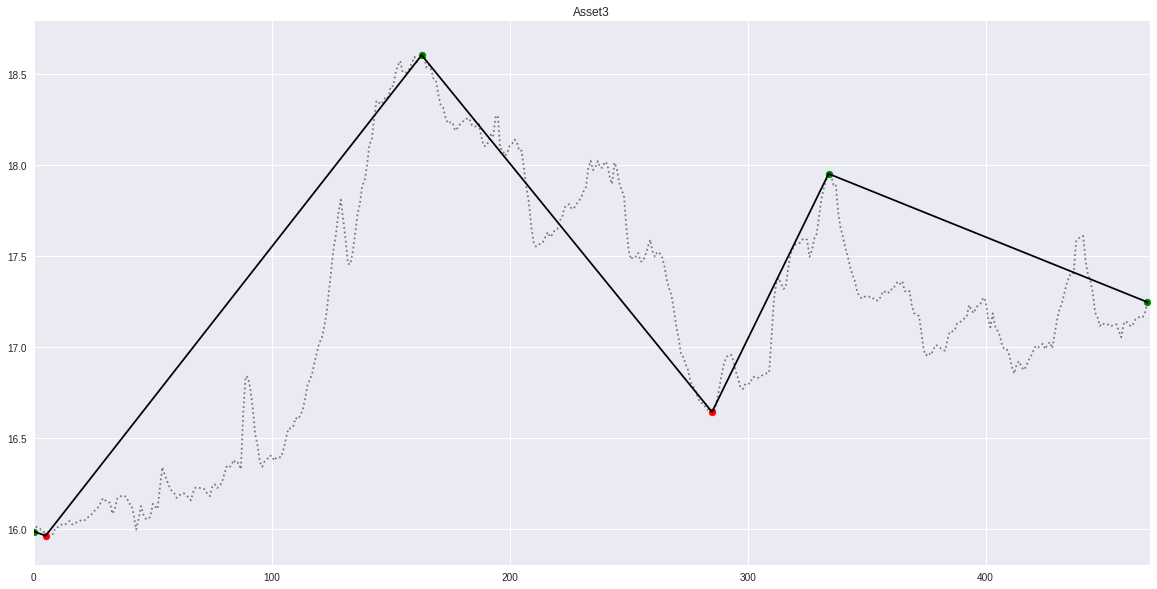

In [ ]:
zigzagPlot(asset3_zigzag, p3)
plt.title("Asset3")
plt.show()

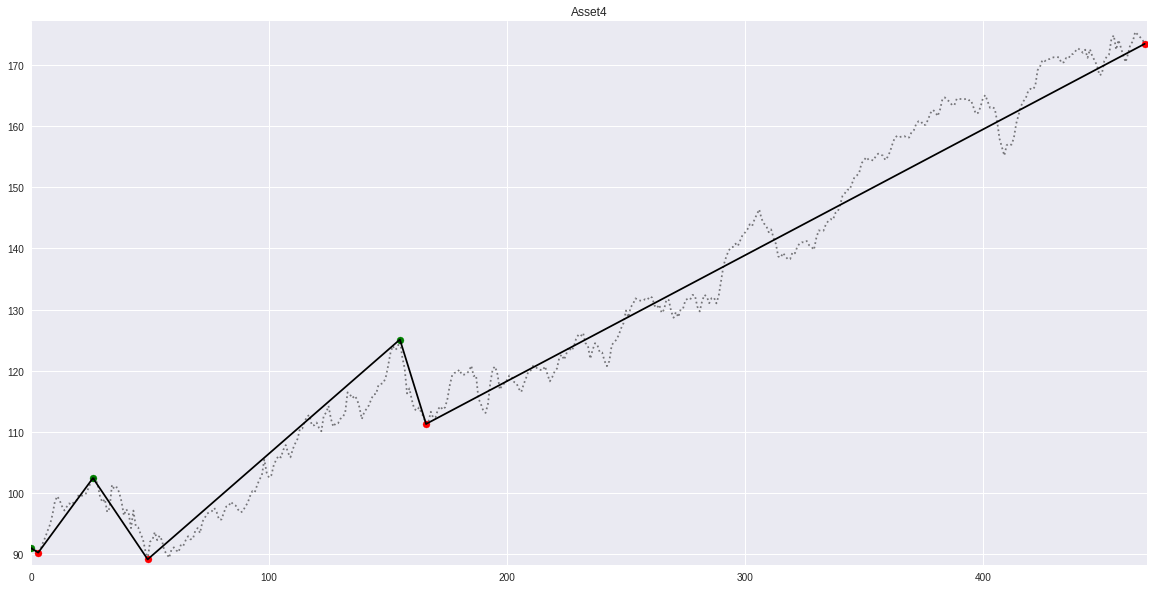

In [ ]:
zigzagPlot(asset4_zigzag, p4)
plt.title("Asset4")
plt.show()

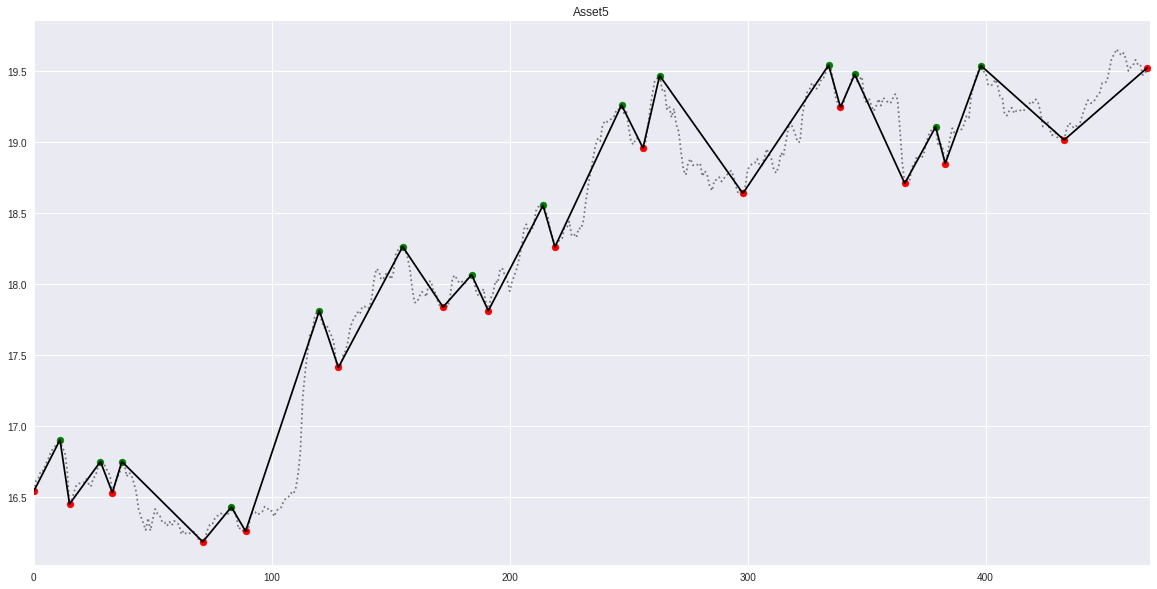

In [ ]:
zigzagPlot(asset5_หzigzag, p5)
plt.title("Asset5")
plt.show()

# predict order function

In [ ]:
from google.colab import output
from tqdm.notebook import tqdm
"""
  code: asset_code's dataframe
  df: asset's dataframe
  ratio: ratio of zigzag indicator low = more line / high = less line
  price: investing price
"""
def zigzagInvesting(code, df, ratio, price):
  # Variable
  obs = Observers(30, train=False)
  close_prices = df.close.to_numpy()
  # Find Zigzag (peak high and low position)
  pivots = zz.peak_valley_pivots(close_prices, ratio, -ratio)
  
  # Create orders
  orders = []
  balanced = obs.getCashBalance()
  isInvest = False
  for ind, pivot in enumerate(pivots):
    tmp = []
    if isInvest and pivot != 0:
      tmp.append({'symbol':code, 'close_all':1})
    
    if pivot == 1 and ind != len(pivots) - 1:
      tmp.append({'symbol':code, 'open_short': price})
    elif pivot == -1 and ind != len(pivots) - 1:
      tmp.append({'symbol':code, 'open_long': price})
    
    isInvest = True
    orders.append(tmp)
  
  # Test Investing
  for order in tqdm(orders):
    status, price_df, liq_pos, done = obs.step(order)
    print('Balance: ', obs.getCashBalance(), ' | Status: ',status, ' | Orders: ', order)
    if status[0]['Position id'] == 'END.':
      break
  
  #Status:  [{'Position id': 'END.', 'Note': 'Out of data.'}]

  profit = obs.getCashBalance() - balanced
  return code, ratio, profit, orders

In [ ]:
# Constant Varaible
price = 20000 # investing amount
ratio_arr = [0.001, 0.01, 0.005, 0.005, 0.005] # array of zigzag ratio
all_investing = {} # result of all investing with different zigzag ratio

# Zigzag Investing loop
asset_code = "Asset04"
ratio_dict = {}
for ratio in ratio_arr:
  code, r, profit, orders = zigzagInvesting(asset_code, datasets[asset_code].iloc[:], ratio, price)
  ratio_dict[ratio] = {'profit':profit, 'orders':orders}
  output.clear()
all_investing[asset_code] = ratio_dict

all_investing

In [ ]:
df1.head()

,Date,close,labels
29,2010-08-04,13.201958,1
30,2010-08-05,13.264115,0
31,2010-08-06,13.285767,0
32,2010-08-09,13.224129,0
33,2010-08-10,13.179427,0


In [ ]:
code, r, profit, orders = zigzagInvesting("Asset01", df1, 0.02, 20000)

# predict order

In [ ]:
# Constant Varaible
price = 20000 # investing amount
ratio_arr = [0.01, 0.09, 0.05, 0.09, 0.01] # array of zigzag ratio
all_investing = {} # result of all investing with different zigzag ratio

index = 0
# Zigzag Investing loop
for asset_code in tqdm(datasets):
  ratio_dict = {}
  print(ratio_arr[index])
  r = ratio_arr[index]
  code, r, profit, orders = zigzagInvesting(asset_code, datasets[asset_code], r, price)
  print(r)
  index = index + 1
  print(index)
  ratio_dict[r] = {'profit':profit, 'orders':orders}
  #output.clear()
  all_investing[asset_code] = ratio_dict

all_investing

  0%|          | 0/5 [00:00<?, ?it/s]

0.01


  0%|          | 0/469 [00:00<?, ?it/s]

Balance:  80000  | Status:  [{'Position id': 1, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset01', 'open_short': 20000}]
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Stat

  0%|          | 0/469 [00:00<?, ?it/s]

Balance:  80000  | Status:  [{'Position id': 1, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset02', 'open_long': 20000}]
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79115.13354982797  | Status:  [{'Position id': [1], 'Note': ['Order closed.']}, {'Position id': 2, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset02', 'close_al

  0%|          | 0/469 [00:00<?, ?it/s]

Balance:  80000  | Status:  [{'Position id': 1, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset03', 'open_short': 20000}]
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79627.16559003106  | Status:  [{'Position id': [1], 'Note': ['Order closed.']}, {'Position id': 2, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset03', 'close_all': 1}, {'symbol': 'Asset03', 'open_long': 20000}]
Balance:  79627.16559003106  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79627.16559003106  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79627.16559003106  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79627.16559003106  | Status:  [{'Position id': 0, 'Note'

  0%|          | 0/469 [00:00<?, ?it/s]

Balance:  80000  | Status:  [{'Position id': 1, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset04', 'open_short': 20000}]
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{'Position id': [1], 'Note': ['Order closed.']}, {'Position id': 2, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset04', 'close_all': 1}, {'symbol': 'Asset04', 'open_long': 20000}]
Balance:  80362.53584936047  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80362.53584936047  | Status:  [{

  0%|          | 0/469 [00:00<?, ?it/s]

Balance:  80000  | Status:  [{'Position id': 1, 'Note': 'Order placed'}]  | Orders:  [{'symbol': 'Asset05', 'open_long': 20000}]
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  80000  | Status:  [{'Position id': 0, 'Note': '-'}]  | Orders:  []
Balance:  79921.16026848067  | Status:  [{'Position id': [1], 'Note': ['Order closed.']}, {'Position 

{'Asset01': {0.01: {'orders': [[{'open_short': 20000, 'symbol': 'Asset01'}],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [{'close_all': 1, 'symbol': 'Asset01'},
     {'open_long': 20000, 'symbol': 'Asset01'}],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    [],
    []

In [ ]:
all_investing['Asset01'][0.01]['orders'][:470]

[[{'open_short': 20000, 'symbol': 'Asset01'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'close_all': 1, 'symbol': 'Asset01'},
  {'open_long': 20000, 'symbol': 'Asset01'}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [ ]:
# ratio 0.05 every asset
for i in range(0,5):
  print(all_investing['Asset0{}'.format(i+1)][0.005]['profit'])

-1090.4436155492294
4291.044148154906
2788.1136790537275
1285.1924360371195
6864.308124694624


In [ ]:
sum = 0
for i in range(0,5):
  print("Asset0{} = {}".format((i+1), all_investing['Asset0{}'.format(i+1)][ratio_arr[i]]['profit']))
  sum = sum + all_investing['Asset0{}'.format(i+1)][ratio_arr[i]]['profit']
print("ratio = ", ratio_arr)
print("profit = ", sum)

Asset01 = 6496.431011218869
Asset02 = 103174.37164214379
Asset03 = 9805.320277815801
Asset04 = 40453.913733160065
Asset05 = 31912.341143138678
ratio =  [0.01, 0.09, 0.05, 0.09, 0.01]
profit =  191842.3778074772


# submission

In [ ]:
def find_2020(predictions_test):
  # find index to start at 2020 to corectly merge train and test data
  index = predictions_test.index

  # '2018-11-15 00:00:00' want to get year
  y_2020 = 0
  for i in range(len(index)):
    a = str(index[i])
    a = a.split(" ")[0].split("-")[0]
    if a == '2020':
      y_2020 = i
      break
  return y_2020

In [ ]:
#df_test_a2.reset_index(inplace=True)
df_test_a2

,Date,open,high,low,close,volume
0,2018-11-14,54.885802,56.971202,54.746775,55.858989,844696
1,2018-11-15,55.630588,56.861966,55.203577,56.067528,256499
2,2018-11-16,56.186697,57.557101,55.501491,56.067528,159001
3,2018-11-19,56.325723,56.931483,54.697124,56.365442,699684
4,2018-11-20,56.991064,57.040715,52.403180,53.058592,983120
...,...,...,...,...,...,...
494,2021-12-27,72.869910,75.561071,72.065543,75.044689,268490
495,2021-12-28,75.441910,76.385303,75.004966,75.451843,249728
496,2021-12-29,75.511423,76.832180,74.836150,76.027805,283557
497,2021-12-30,76.047670,76.901693,75.253228,76.454816,231163


In [ ]:
y_2020 = find_2020(df_test_a2)
y_2020

0

In [ ]:
y_2020 = find_2020(df_test_a2)
s = df_test_a2[y_2020:]
# s.reset_index(inplace=True)
s = s[['Date', 'close']]
s

,Date,close
0,2018-11-14,55.858989
1,2018-11-15,56.067528
2,2018-11-16,56.067528
3,2018-11-19,56.365442
4,2018-11-20,53.058592
...,...,...
494,2021-12-27,75.044689
495,2021-12-28,75.451843
496,2021-12-29,76.027805
497,2021-12-30,76.454816


In [ ]:
s.rename({'close':'Order', 'Date':'Timestamp'}, axis=1, inplace=True)

In [ ]:
s

,Timestamp,Order
0,2018-11-14,55.858989
1,2018-11-15,56.067528
2,2018-11-16,56.067528
3,2018-11-19,56.365442
4,2018-11-20,53.058592
...,...,...
494,2021-12-27,75.044689
495,2021-12-28,75.451843
496,2021-12-29,76.027805
497,2021-12-30,76.454816


In [ ]:
s = s[30:]

In [ ]:
s['Order'] = np.empty((len(s), 0)).tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
s = s[30:]

In [ ]:
s1 = s.copy()

In [ ]:
s1

,Timestamp,Order
30,2020-01-02,[]
31,2020-01-03,[]
32,2020-01-06,[]
33,2020-01-07,[]
34,2020-01-08,[]
...,...,...
494,2021-12-27,[]
495,2021-12-28,[]
496,2021-12-29,[]
497,2021-12-30,[]


In [ ]:
# [0.01, 0.09, 0.05, 0.09, 0.01]
asset_1 = all_investing['Asset01'][0.01]['orders'][:469]
asset_2 = all_investing['Asset02'][0.09]['orders']
asset_3 = all_investing['Asset03'][0.05]['orders']
asset_4 = all_investing['Asset04'][0.09]['orders']
asset_5 = all_investing['Asset05'][0.01]['orders']

In [ ]:
asset_all = []
for i in range(len(asset_1)):
  x = asset_1[i][:]
  x.extend(asset_2[i][:])
  x.extend(asset_3[i][:])
  x.extend(asset_4[i][:])
  x.extend(asset_5[i][:])
  asset_all.append(x)

In [ ]:
len(asset_all)

469

In [ ]:
s['Order'] = asset_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
s.to_csv("log_order.csv", index=False)

___

In [ ]:
for index, row in s.iterrows():
  # if asset_1[index] != None:
  #   df_correct.at[index,'Order'] = order[index].append(asset_1)
  # print(asset_1[index] + asset_2[index] + asset_3[index] + asset_4[index] + asset_5[index])
  s.at[index,'Order'] = asset_1[index] + asset_2[index] + asset_3[index] + asset_4[index] + asset_5[index]

IndexError: ignored

# Visualize every df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def zigzagPlot(X, pivots):
  plt.figure(figsize=(20, 10))
  plt.xlim(0, len(X))
  plt.ylim(X.min()*0.99, X.max()*1.01)
  plt.plot(np.arange(len(X)), X, 'k:', alpha=0.5)
  plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
  plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='g')
  plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='r')

### df_a1 & df_test_a1

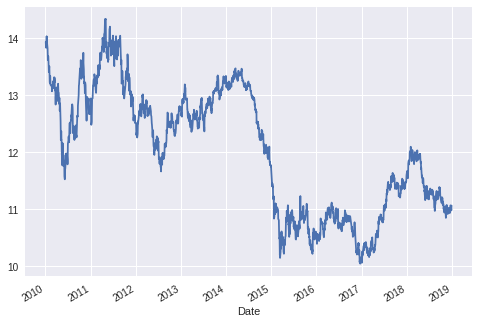

In [ ]:
df_a1['close'].plot()

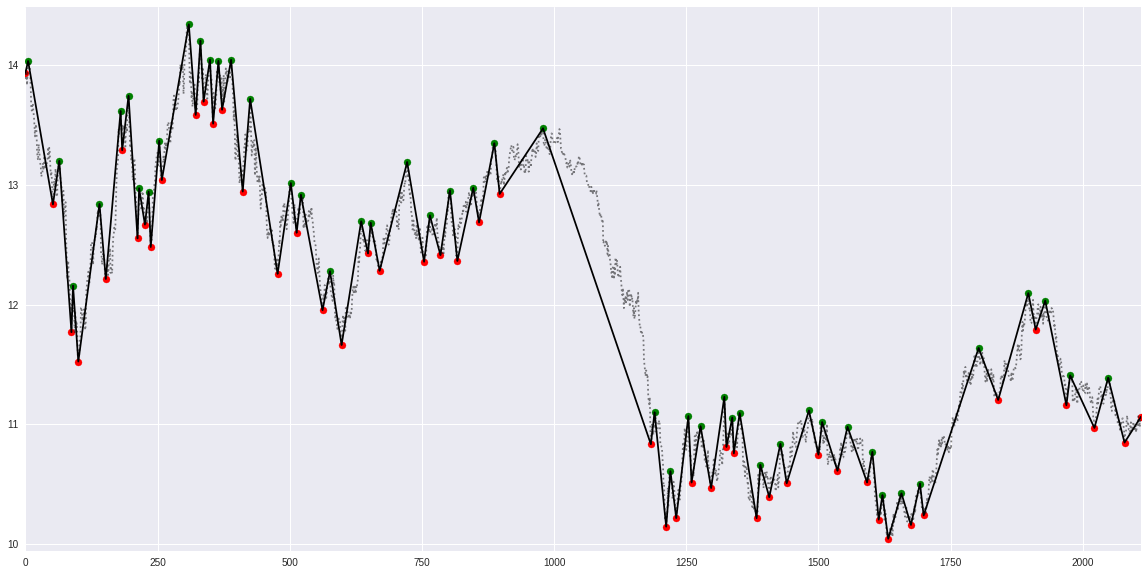

In [ ]:
zigzagPlot(df_a1['close'].values, p1)

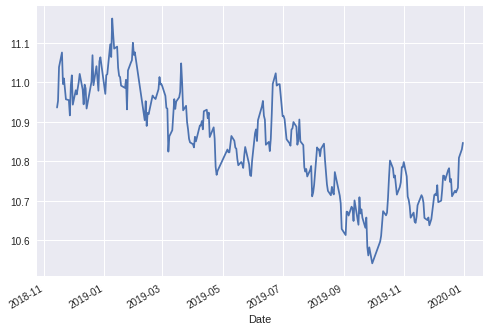

In [ ]:
df_test_a1['close'].plot()

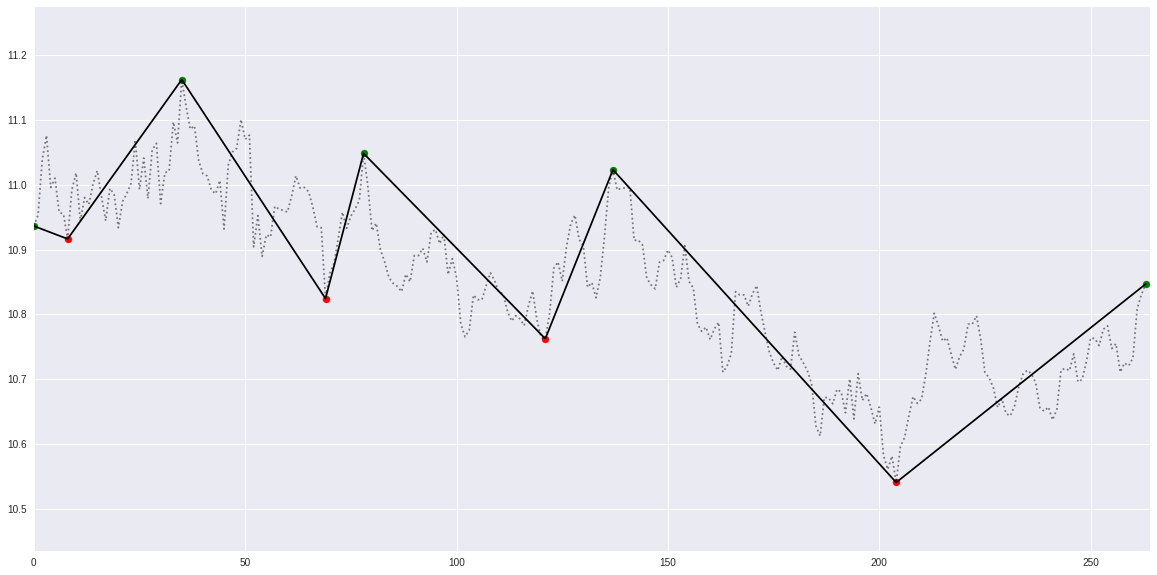

In [ ]:
zigzagPlot(df_test_a1['close'].values, p1_test)

### df_a2 & df_test_a2

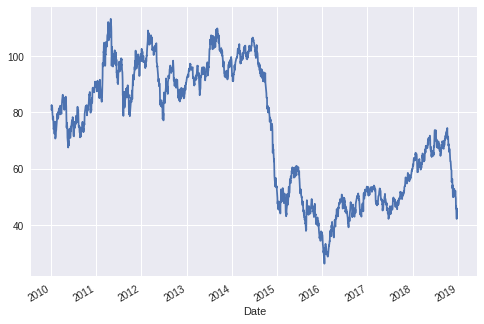

In [ ]:
df_a2['close'].plot()

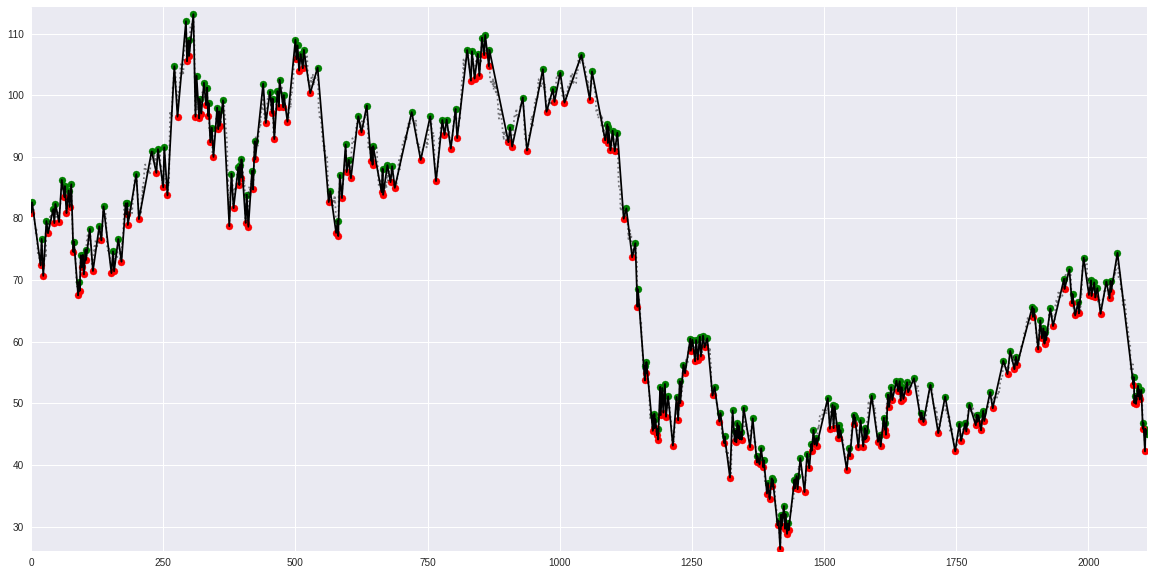

In [ ]:
zigzagPlot(df_a2['close'].values, p2)

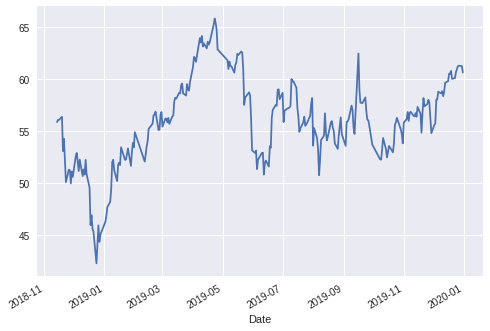

In [ ]:
df_test_a2['close'].plot()

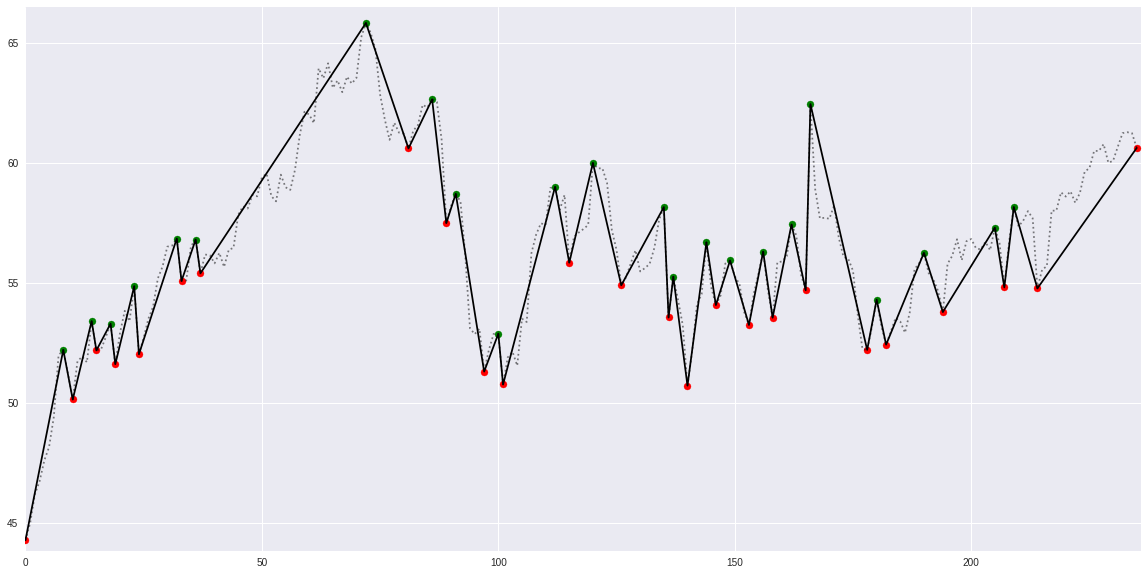

In [ ]:
zigzagPlot(df_test_a2['close'].values, p2_test)

### df_a3 & df_test_a3

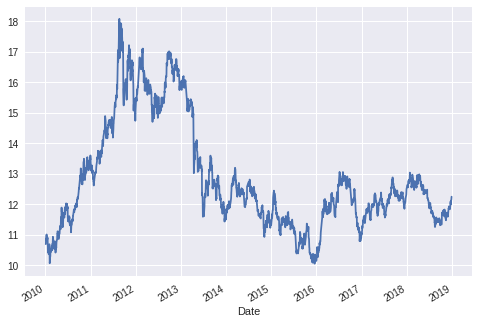

In [ ]:
df_a3['close'].plot()

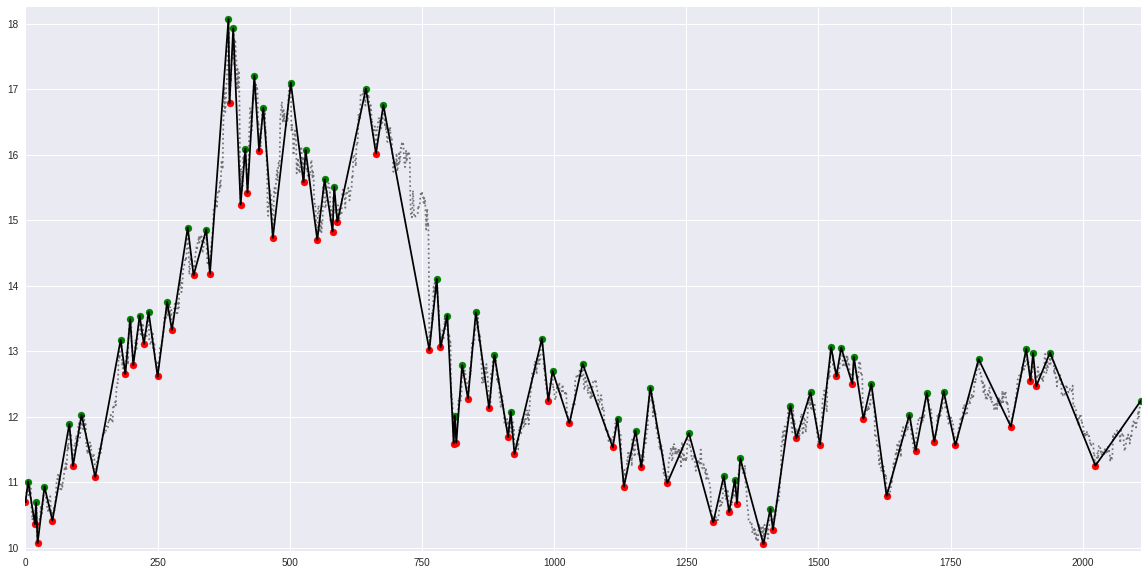

In [ ]:
zigzagPlot(df_a3['close'].values, p3)

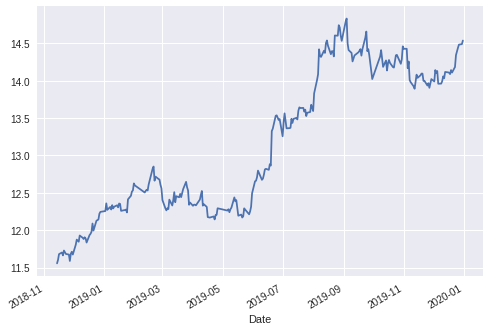

In [ ]:
df_test_a3['close'].plot()

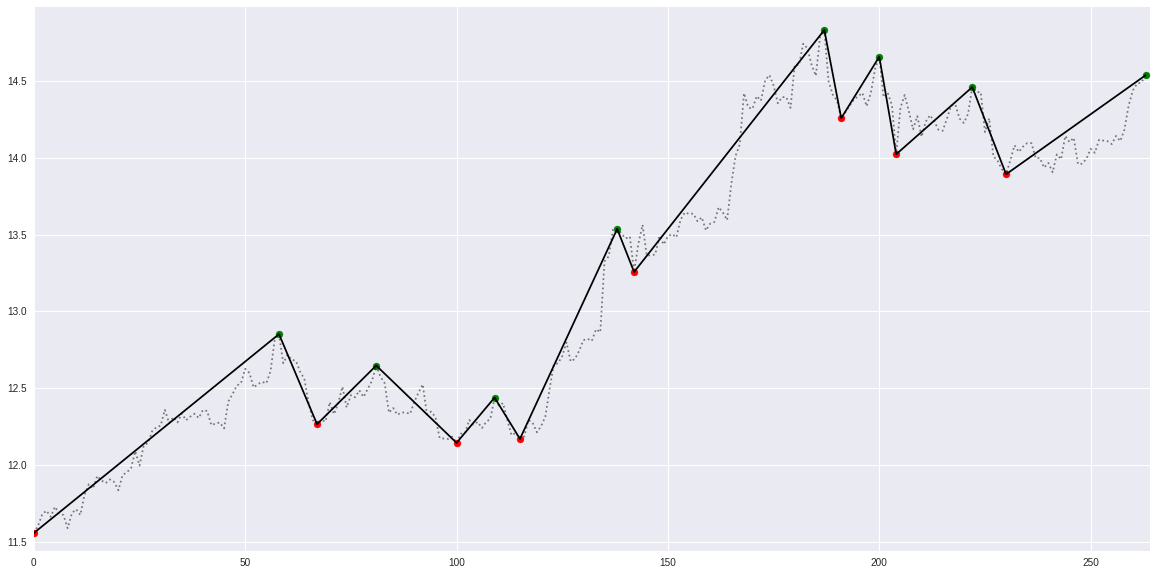

In [ ]:
zigzagPlot(df_test_a3['close'].values, p3_test)

### df_a4 & df_test_a4

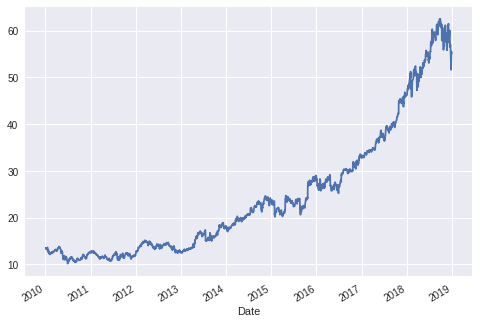

In [ ]:
df_a4['close'].plot()

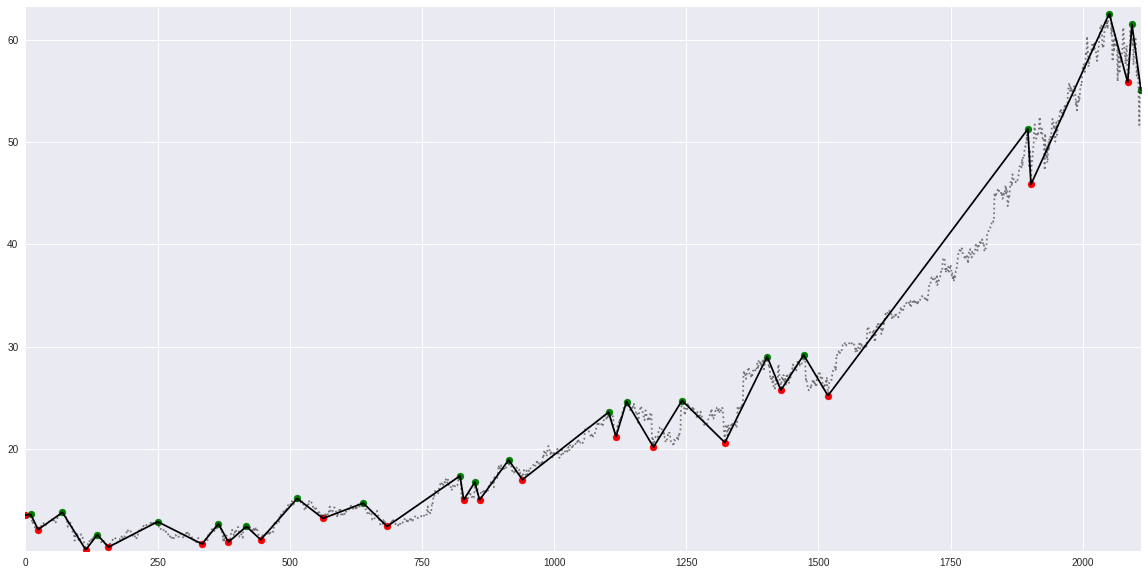

In [ ]:
zigzagPlot(df_a4['close'].values, p4)

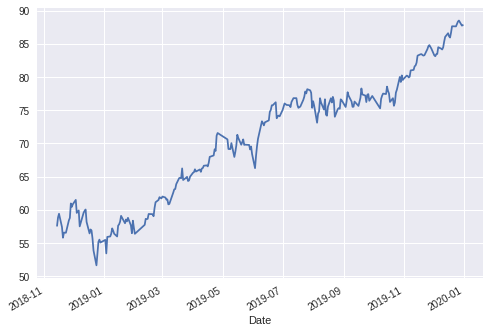

In [ ]:
df_test_a4['close'].plot()

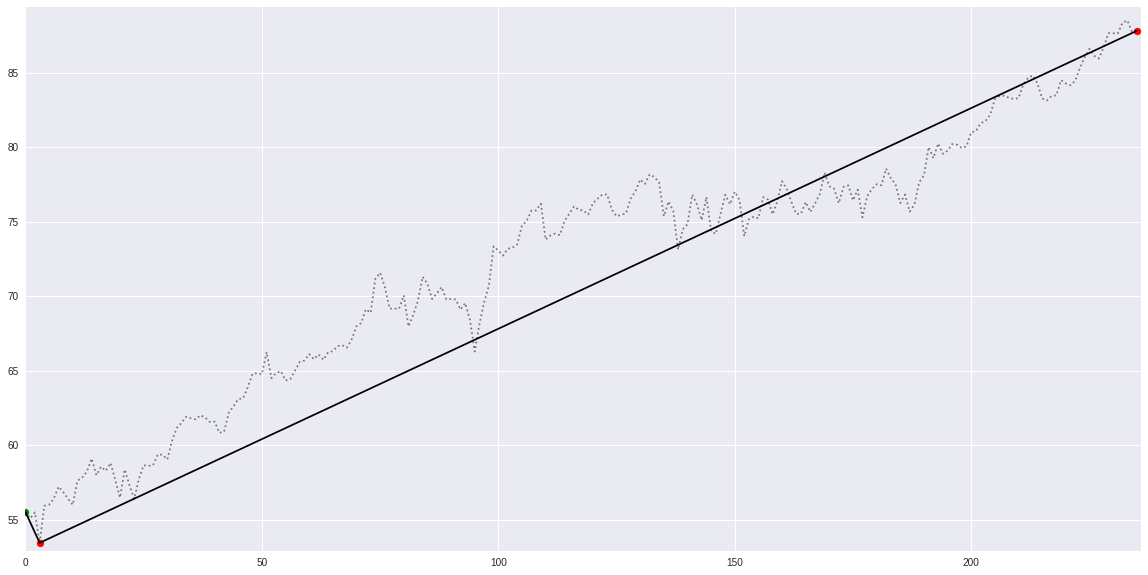

In [ ]:
zigzagPlot(df_test_a4['close'].values, p4_test)

### df_a5 && df_test_a5

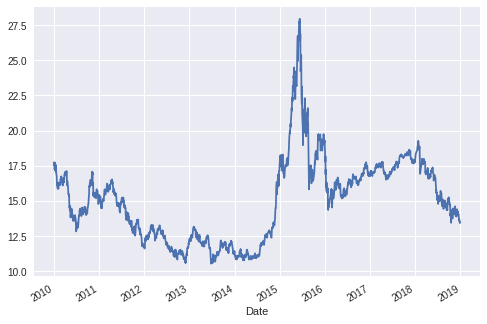

In [ ]:
df_a5['close'].plot()

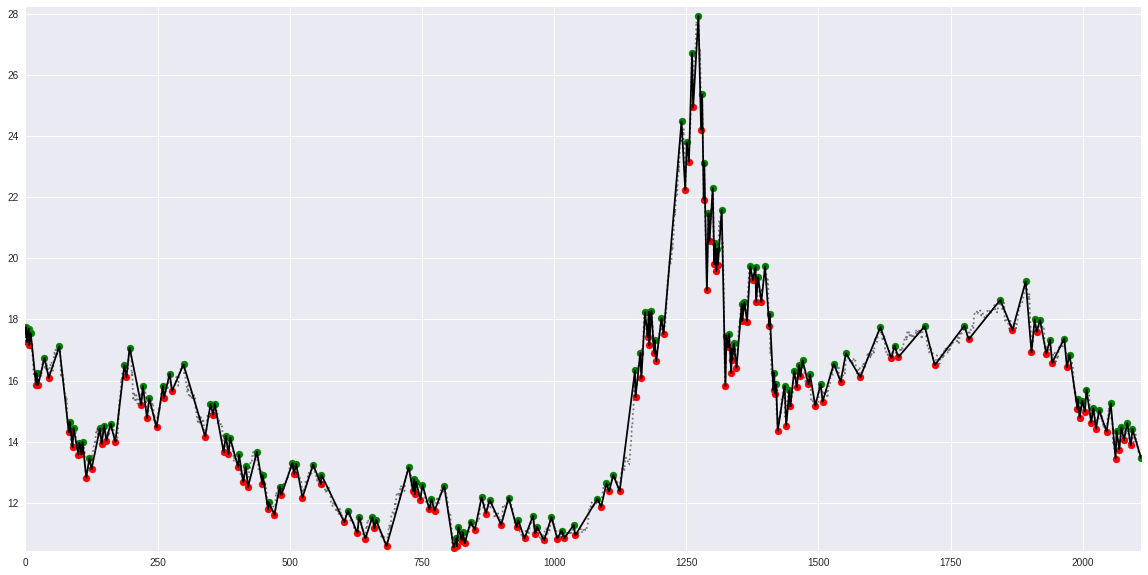

In [ ]:
zigzagPlot(df_a5['close'].values, p5)

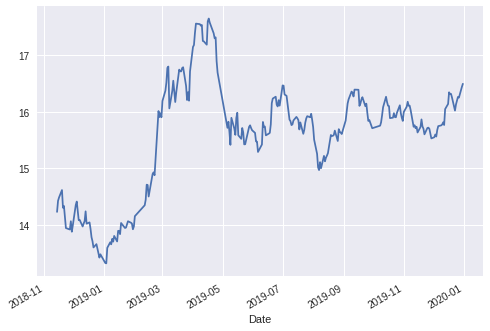

In [ ]:
df_test_a5['close'].plot()

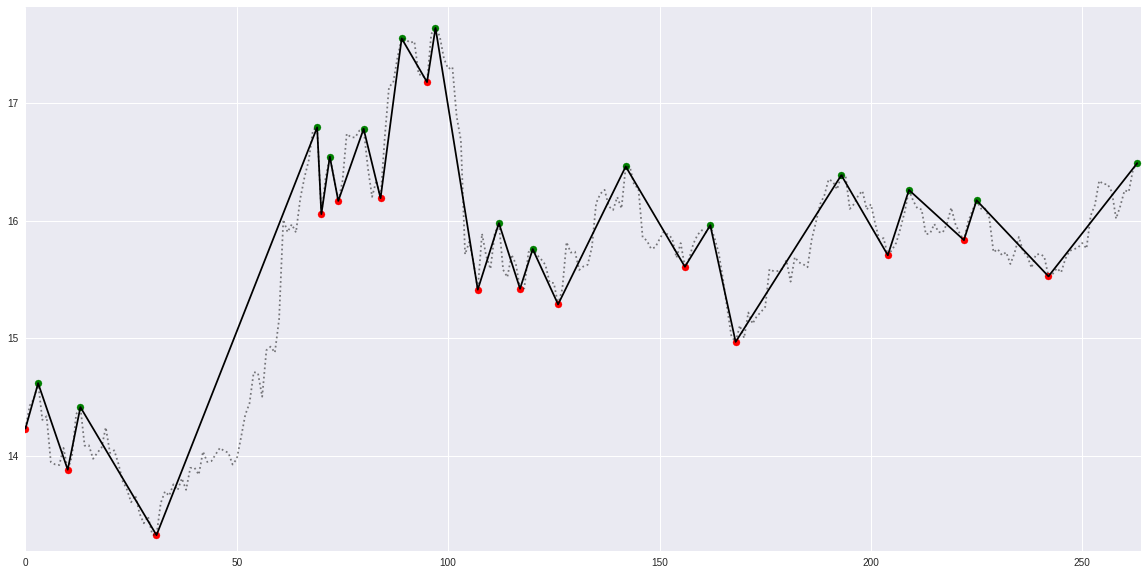

In [ ]:
zigzagPlot(df_test_a5['close'].values, p5_test)

# <hr></hr>